In [ ]:
!pip install nltk
!pip install wordcloud

import nltk
from nltk.corpus import brown
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('brown')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Accessing the categories (genres) in the Brown Corpus



[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Accessing the categories (genres) in the Brown Corpus
categories = brown.categories()
print('Categories in the Brown Corpus are',categories)

# Accessing specific texts in a category
text = brown.raw(categories='news')

# Create a set of stop words
stop_words = set(stopwords.words('english'))
print('Stop Words are',stop_words)

Categories in the Brown Corpus are ['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']
Stop Words are {'and', "don't", "wouldn't", 'her', 'under', "you've", 'then', 'shan', 'its', 'are', 'on', 'where', 'not', 'only', 'into', 'mightn', 'during', "needn't", 'an', 'between', 'most', 'out', "isn't", 'how', 'couldn', 'did', 'am', 'through', 'aren', 'hasn', 'until', "couldn't", 'about', 'be', 'here', 'because', 'the', 'y', 'which', "she's", 'weren', 'itself', 'doing', 'had', 'were', 'yourselves', 'shouldn', "wasn't", "mightn't", 'with', 'he', 'there', "mustn't", 'more', 'him', 'mustn', 'while', 'now', 'ours', 'isn', 'but', 'over', 'no', 'below', 'yourself', 't', 'been', 'same', 'o', 'hadn', 'ain', 'all', 'from', 'above', 'my', "you'd", 'being', 'again', 'them', 'will', "didn't", 'before', 'do', 'in', 'don', 'each', "should've", 'these', 'what', 'it', 'a', 'having',

In [ ]:
# Define a function to remove stop words from a sentence
def remove_stop_words(sentence):
    # Split the sentence into individual words
    words = sentence.split()

    # Use a list comprehension to remove stop words
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a sentence
    return ' '.join(filtered_words)

filtered_text = remove_stop_words(text)
print('Text after Removing the stop words from that benchmark text corpora.',filtered_text) # Apply stop words removal

Text after Removing the stop words from that benchmark text corpora. The/at Fulton/np-tl County/nn-tl Grand/jj-tl Jury/nn-tl said/vbd Friday/nr an/at investigation/nn of/in Atlanta's/np$ recent/jj primary/nn election/nn produced/vbd ``/`` no/at evidence/nn ''/'' that/cs any/dti irregularities/nns took/vbd place/nn ./. The/at jury/nn further/rbr said/vbd in/in term-end/nn presentments/nns that/cs the/at City/nn-tl Executive/jj-tl Committee/nn-tl ,/, which/wdt had/hvd over-all/jj charge/nn of/in the/at election/nn ,/, ``/`` deserves/vbz the/at praise/nn and/cc thanks/nns of/in the/at City/nn-tl of/in-tl Atlanta/np-tl ''/'' for/in the/at manner/nn in/in which/wdt the/at election/nn was/bedz conducted/vbn ./. The/at September-October/np term/nn jury/nn had/hvd been/ben charged/vbn by/in Fulton/np-tl Superior/jj-tl Court/nn-tl Judge/nn-tl Durwood/np Pye/np to/to investigate/vb reports/nns of/in possible/jj ``/`` irregularities/nns ''/'' in/in the/at hard-fought/jj primary/nn which/wdt was/b

In [ ]:
def count_word_occurrences(sentence):
    # Split the sentence into individual words
    words = sentence.split()

    # Count occurrences using a dictionary
    word_counts = {}
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    return word_counts

word_counts = count_word_occurrences(filtered_text)
print('Count after the occurrence of every word present in the corpa after removing the stop word.',word_counts) # Count word occurrences

Count after the occurrence of every word present in the corpa after removing the stop word. {'The/at': 775, 'Fulton/np-tl': 10, 'County/nn-tl': 35, 'Grand/jj-tl': 5, 'Jury/nn-tl': 2, 'said/vbd': 382, 'Friday/nr': 41, 'an/at': 300, 'investigation/nn': 9, 'of/in': 2716, "Atlanta's/np$": 4, 'recent/jj': 20, 'primary/nn': 13, 'election/nn': 38, 'produced/vbd': 5, '``/``': 732, 'no/at': 104, 'evidence/nn': 17, "''/''": 702, 'that/cs': 545, 'any/dti': 90, 'irregularities/nns': 3, 'took/vbd': 47, 'place/nn': 21, './.': 4012, 'jury/nn': 43, 'further/rbr': 5, 'in/in': 1828, 'term-end/nn': 1, 'presentments/nns': 1, 'the/at': 5558, 'City/nn-tl': 41, 'Executive/jj-tl': 2, 'Committee/nn-tl': 35, ',/,': 5133, 'which/wdt': 244, 'had/hvd': 260, 'over-all/jj': 2, 'charge/nn': 16, 'deserves/vbz': 3, 'praise/nn': 2, 'and/cc': 2115, 'thanks/nns': 5, 'of/in-tl': 128, 'Atlanta/np-tl': 4, 'for/in': 905, 'manner/nn': 7, 'was/bedz': 716, 'conducted/vbn': 6, 'September-October/np': 1, 'term/nn': 13, 'been/ben':

In [ ]:
#Stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in word_counts.keys()]

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in word_counts.keys()]

# Print a few stemmed and lemmatized words to compare
print("Stemmed words:")
print(stemmed_words[:10])
print("Lemmatized words:")
print(lemmatized_words[:10])
# Convert lists to sets
stemmed_set = set(stemmed_words)
lemmatized_set = set(lemmatized_words)

# Find the difference between stemming and lemmatization
difference = stemmed_set.difference(lemmatized_set)
print("Difference between stemmed words and lemmatized words:", difference)


Stemmed words:
['the/at', 'fulton/np-tl', 'county/nn-tl', 'grand/jj-tl', 'jury/nn-tl', 'said/vbd', 'friday/nr', 'an/at', 'investigation/nn', 'of/in']
Lemmatized words:
['The/at', 'Fulton/np-tl', 'County/nn-tl', 'Grand/jj-tl', 'Jury/nn-tl', 'said/vbd', 'Friday/nr', 'an/at', 'investigation/nn', 'of/in']
Difference between stemmed words and lemmatized words: {'convenience/nn-hl', 'stacy/np-tl', 'carmichael/np', 'walbridge/np', 'forte/np', 'karol/np', 'kanin/np', "women's/nns$-tl", 'uhles/np', 'bankers/nn', 'study/vb-tl', 'stamford/np', 'luise/np', 'computers/nn', 'hostesses/nn', 'vice/jj-tl', 'criteria/nn', 'stewardesses/nn', 'bay/nn-tl', 'bessie/np', 'cain/np-tl', 'millie/np', 'texas/np-hl', 'countries/nn', 'pabor/np', 'screvane/np-hl', 'stevens/np', 'orleans/np-tl', 'humphrey/np', 'teammates/nn', 'questions/nns-tl', 'pierce/np', 'morehouse/np', 'vienna/np', 'defense/nn-tl', 'mastodons/nn', '$4,177.37/nn', 'representations/nn', 'n./jj-tl', 'colquitt/np-tl', 'impressions/nn', 'proceeds/nn

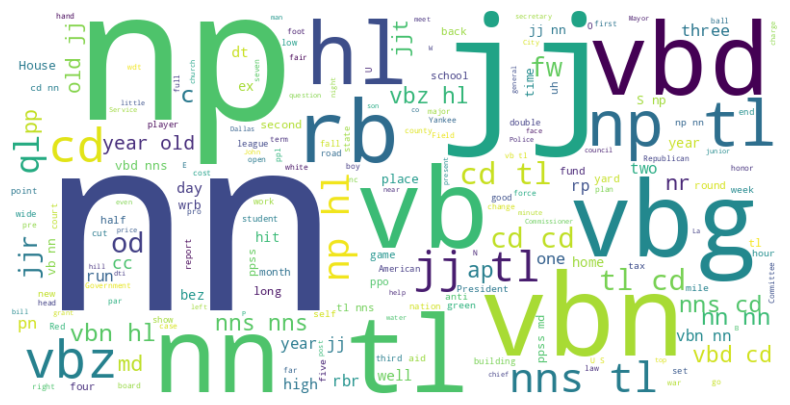

In [ ]:

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(lemmatized_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()